<a href="https://colab.research.google.com/github/jr-gumtau/datascience15/blob/main/Copy_of_Images_To_Do_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# work with an array, not a list, so you won't eat up your gpus. and it'll be faster.

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



The goal is to build a neural network that can predict whether the animal within the image is a cat or a dog. This is an unsupervised classification problem.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

from IPython.display import Image
from IPython.core.display import HTML

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [4]:
urlx = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [5]:
urly = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [6]:
test = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [7]:
X = pd.read_pickle(urlx)
y = pd.read_pickle(urly)

In [8]:
type(X)

numpy.ndarray

In [9]:
# transform y into an array
y = np.array(y)

In [10]:
type(y)

numpy.ndarray

In [11]:
# shrink the array to 1k
X = X[:1000]
y = y[:1000]

In [12]:
X

array([[[[ 95],
         [ 94],
         [ 98],
         ...,
         [170],
         [172],
         [171]],

        [[ 92],
         [ 91],
         [ 95],
         ...,
         [170],
         [172],
         [171]],

        [[ 89],
         [ 91],
         [ 92],
         ...,
         [165],
         [169],
         [169]],

        ...,

        [[ 84],
         [ 76],
         [ 73],
         ...,
         [135],
         [164],
         [154]],

        [[ 82],
         [ 79],
         [ 71],
         ...,
         [142],
         [134],
         [153]],

        [[ 80],
         [ 85],
         [ 85],
         ...,
         [151],
         [146],
         [138]]],


       [[[171],
         [154],
         [139],
         ...,
         [185],
         [187],
         [188]],

        [[146],
         [140],
         [129],
         ...,
         [187],
         [187],
         [188]],

        [[128],
         [132],
         [128],
         ...,
         [186],
         [

In [13]:
x_train = X[:800]
x_test = X[800:]
y_train = y[:800]
y_test = y[800:]

In [14]:
# view an image in the dataset
y_train[1]

1

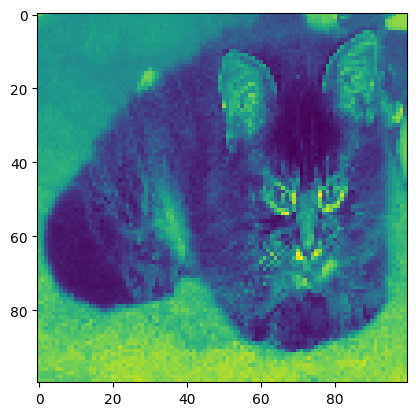

In [15]:
plt.imshow(x_train[1])

In [16]:
# make a function that shows the image and the index
def show_image(index):
    plt.imshow(x_train[index])
    plt.title(y_train[index])
    plt.show()

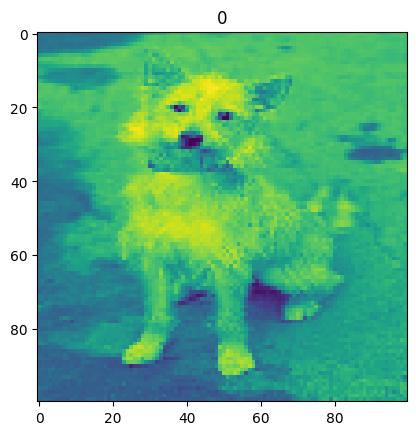

In [17]:
show_image(0)

dogs appear to be zeroes and cats appear to be ones

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [18]:
# scale the values in x so that they fall between 0 and 1 by dividing by 255
# quality assurance measure
# size of an image might be contributing to a model's decision
# standardized images help these
# to avoid errors in your input layer

x_train = x_train / 255
x_test = x_test / 255

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using plt.imshow().

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.